# 10. 딥러닝 프로젝트
### 과정 개요
1. Boston 주택 가격 예측 모델  
여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.  

2. Reuters 딥러닝 모델  
시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.  

3. CIFAR10 딥러닝 모델  
이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.  

### 학습 목표
- Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.
- Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다.
- CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습합니다.
---

## 1. Boston 주택 가격 예측 모델
Boston 주택 가격 예측 모델에서 사용되는 데이터셋은   

- 보스턴 시의 주택 가격 데이터셋으로,
- 주택의 여러 요건과 가격 정보가 포함되어 있습니다.
- **회귀분석에 자주 사용되는 대표적인 데이터셋**  

[데이터셋의 feature에 대한 설명](https://www.notion.so/10-7d0f96a4936849a6965da8573c9423fd)

- 입력 유닛의 수는 13 : 총 14개의 피처 중 최종적으로 예측하고자 하는 '가격'을 제외한 것.
- 출력 유닛의 수는 1 : 모델이 예측하여 알아서 출력값을 주기 때문

### 데이터 로드 및 전처리
먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.  
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다.   
Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

(282, 13) (282,)
(102, 13) (102, 1)
(122, 13) (122,)
(102, 13) (102, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 13)                52        
 Normalization)                                                  
                                                                 
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5173 (20.21 KB)
Trainable params: 

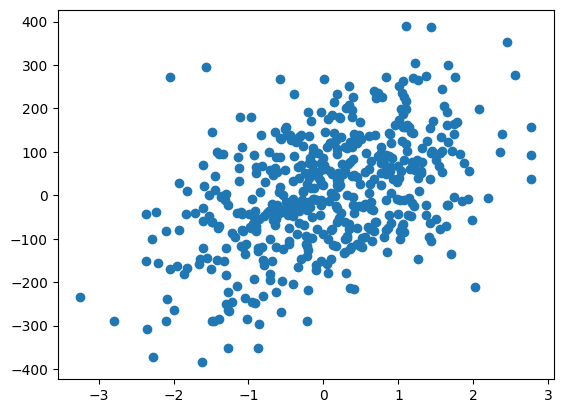

In [12]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# train, test data 나누기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=506, n_features=13, bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)
plt.scatter(X[:, 0], y)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
test_size=0.3,
shuffle=True,
random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils
from tensorflow.keras.optimizers import RMSprop

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

### 모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.  

#### Best 결과
loss: 17112.4629 - mae: 103.1033

In [13]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
3/3 [==============================] - 0s 74ms/step - loss: 566.8469 - mae: 21.9499 - val_loss: 586.9651 - val_mae: 22.4020
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 540.6507 - mae: 21.3404 - val_loss: 563.6454 - val_mae: 21.8596
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 517.0995 - mae: 20.7338 - val_loss: 542.1250 - val_mae: 21.3471
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 497.0205 - mae: 20.2162 - val_loss: 520.3502 - val_mae: 20.8179
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 477.9867 - mae: 19.7298 - val_loss: 497.8375 - val_mae: 20.2683
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 458.6992 - mae: 19.2197 - val_loss: 474.8366 - val_mae: 19.6902
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 435.2117 - mae: 18.5663 - val_loss: 450.3986 - val_mae: 19.0713
Epoch 8/20
3/3 [==============================] - 0s 5ms/step

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

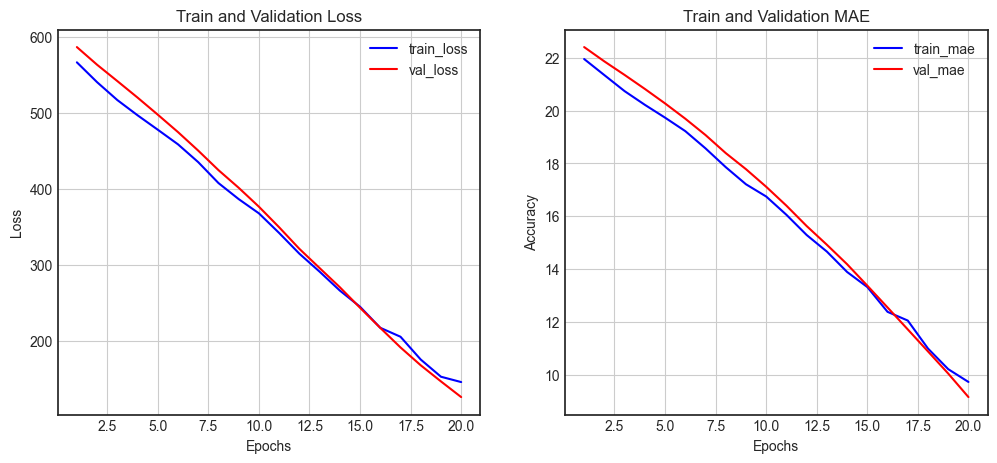

In [14]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 964us/step - loss: 17112.4629 - mae: 103.1033


[17112.462890625, 103.1032943725586]

#### 옵티마이저 Adam으로 변경하여 시도  
loss: 17307.0176 - mae: 103.7350

(282, 13) (282,)
(102, 13) (102, 1)
(122, 13) (122,)
(102, 13) (102, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 13)                52        
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)                896       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5173 (20.21 KB)
Trainable params: 

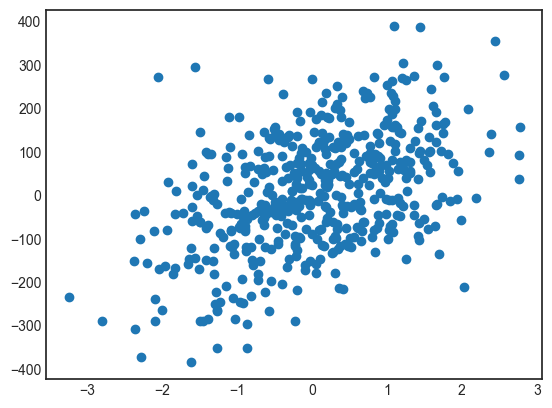

In [16]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# train, test data 나누기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=506, n_features=13, bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)
plt.scatter(X[:, 0], y)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
test_size=0.3,
shuffle=True,
random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils
from tensorflow.keras.optimizers import RMSprop

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

In [20]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
3/3 [==============================] - 0s 25ms/step - loss: 581.5853 - mae: 22.2882 - val_loss: 615.7135 - val_mae: 23.0518
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 572.2989 - mae: 22.1011 - val_loss: 603.5858 - val_mae: 22.8050
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 561.7889 - mae: 21.8563 - val_loss: 591.7018 - val_mae: 22.5614
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 548.3509 - mae: 21.5687 - val_loss: 579.8594 - val_mae: 22.3154
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 541.2603 - mae: 21.3862 - val_loss: 567.9035 - val_mae: 22.0636
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 526.8542 - mae: 21.1016 - val_loss: 555.4528 - val_mae: 21.7985
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 514.4895 - mae: 20.8355 - val_loss: 542.1176 - val_mae: 21.5110
Epoch 8/20
3/3 [==============================] - 0s 5ms/step

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

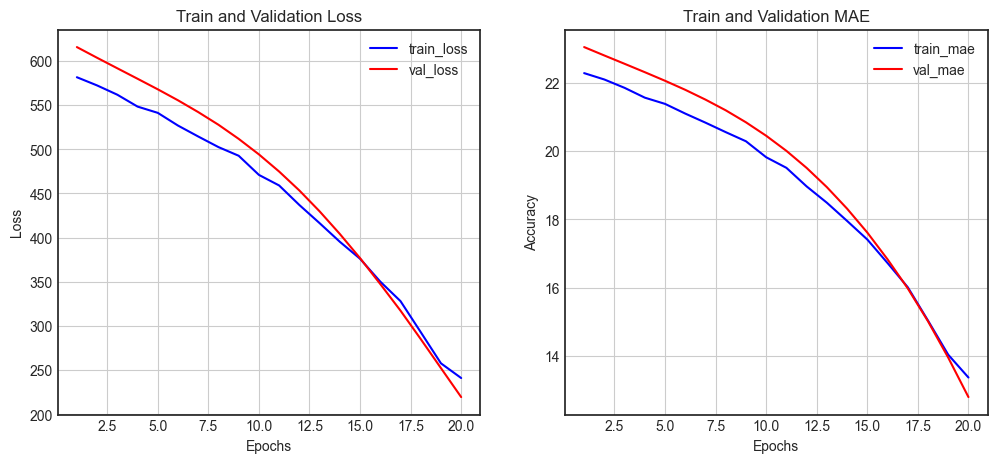

In [21]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 17307.0176 - mae: 103.7350


[17307.017578125, 103.73501586914062]

#### epochs=100, batch_size=32, early_stopping 활용
loss: 17545.0039 - mae: 103.6835

(282, 13) (282,)
(102, 13) (102, 1)
(122, 13) (122,)
(102, 13) (102, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 13)                52        
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 64)                896       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5173 (20.21 KB)
Trainable params: 

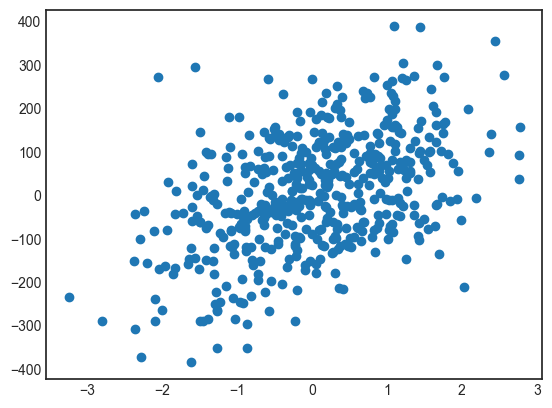

In [23]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# train, test data 나누기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=506, n_features=13, bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)
plt.scatter(X[:, 0], y)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
test_size=0.3,
shuffle=True,
random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils
from tensorflow.keras.optimizers import RMSprop

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

In [24]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
9/9 [==============================] - 0s 9ms/step - loss: 546.1296 - mae: 21.5334 - val_loss: 553.8307 - val_mae: 21.7182
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 491.1260 - mae: 20.2213 - val_loss: 499.3879 - val_mae: 20.4717
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 436.4902 - mae: 18.8642 - val_loss: 435.5711 - val_mae: 18.9465
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 374.9883 - mae: 17.2850 - val_loss: 364.8976 - val_mae: 17.1542
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 310.3344 - mae: 15.3463 - val_loss: 290.9393 - val_mae: 15.0328
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 245.1202 - mae: 13.4611 - val_loss: 219.5612 - val_mae: 12.6436
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 190.1447 - mae: 11.2481 - val_loss: 161.1428 - val_mae: 10.3070
Epoch 8/100
9/9 [==============================] - 0s 3

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 3ms/step - loss: 103.8585 - mae: 7.7835 - val_loss: 69.0071 - val_mae: 6.4216
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 82.2530 - mae: 6.7657 - val_loss: 56.3305 - val_mae: 5.8168
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 75.8352 - mae: 6.5250 - val_loss: 46.3375 - val_mae: 5.2908
Epoch 13/100
9/9 [==============================] - 0s 3ms/step - loss: 71.8826 - mae: 6.4127 - val_loss: 37.6088 - val_mae: 4.7500
Epoch 14/100
9/9 [==============================] - 0s 2ms/step - loss: 60.9414 - mae: 5.9397 - val_loss: 33.1283 - val_mae: 4.4563
Epoch 15/100
9/9 [==============================] - 0s 2ms/step - loss: 63.9495 - mae: 5.9419 - val_loss: 27.6062 - val_mae: 4.0579
Epoch 16/100
9/9 [==============================] - 0s 2ms/step - loss: 62.3151 - mae: 5.8957 - val_loss: 23.9255 - val_mae: 3.7518
Epoch 17/100
9/9 [==============================] - 0s 2ms/step - loss: 54.6252 - mae: 5

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

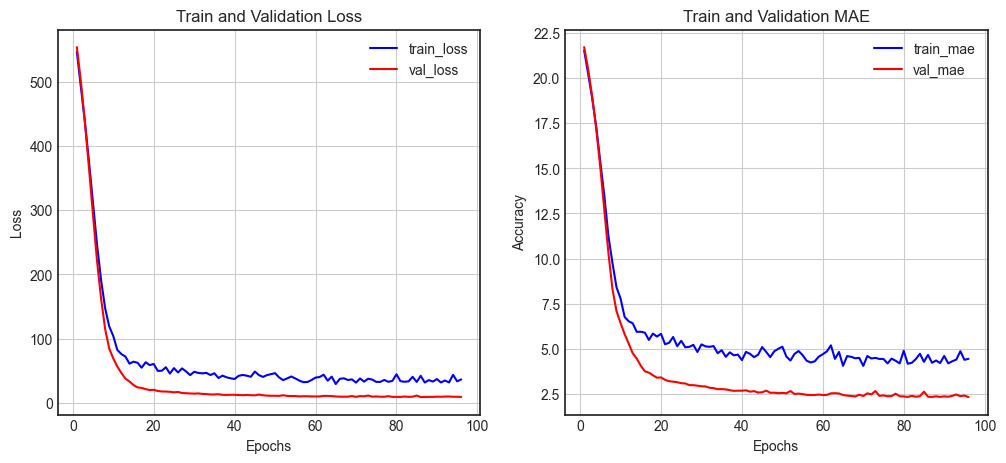

In [25]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [26]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 17545.0039 - mae: 103.6835


[17545.00390625, 103.6834945678711]